In [1]:
%matplotlib inline

## Q-transforms in GWpy

In parts [1](./1 - Open Data access with GWpy.ipynb) and [2](./2 - Filtering data with GWpy.ipynb) we have seen how to load data, filter in the time-domain, and make lots of plots.

The filtering we did required a fair amount of knowledge of what sorts of noises are present in the LIGO detectors, and what frequencies are relevant for detecting a gravitational-wave signal from a binary black hole merger.

In this section, we will see how we can use a special filter called a Q-transform to create a time-frequency representation of our data that allows use to pick out features at different frequencies, and how they evolve over time, without much prior knowledge of the signal morphology.

See [this article](https://doi.org/10.1088/0264-9381/21/20/024) for more details on the Q-transform and its application to gravitational-wave data.

So, lets reload our data, this time using GW170817:

In [2]:
from gwpy.io.losc import event_gps
from gwpy.timeseries import TimeSeries

gps = event_gps('GW170817')
segment = (int(gps) - 30, int(gps) + 2)
hdata = TimeSeries.fetch_open_data('H1', *segment, tag='CLN', verbose=True, cache=True)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/bleach/__init__.py:32: DeprecationWarning: Support for html5lib-python < 1.0.0 is deprecated.
  warnings.warn('Support for html5lib-python < 1.0.0 is deprecated.', DeprecationWarning)


Fetched 1 URLs from https://losc.ligo.org for [1187008852 .. 1187008884)
Reading data... [Done]


We can now use the `q_transform()` method of the `hdata` `TimeSeries` to create our time-frequency representation (as a [spectrogram](https://gwpy.github.io/docs/stable/spectrogram/)).

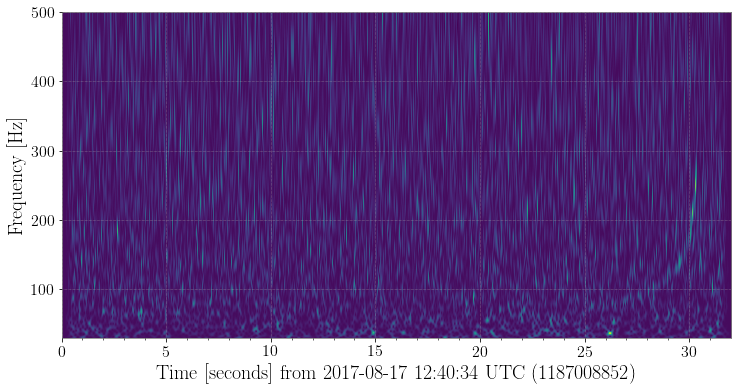

In [3]:
hq = hdata.q_transform(frange=(30, 500))
plot = hq.plot()

Here we see the vague track of a binary neutron star merger, but it looks... smudgy. This is because the highest energy time-frequency pixel was found with a low Q value (Q~=5), which doesn't work well for such long-duration signals as a binary neutron star.
We can rerun the Q-transform using a narrow Q range at higher Q (Q~=100), to resolve the BNS track much better:

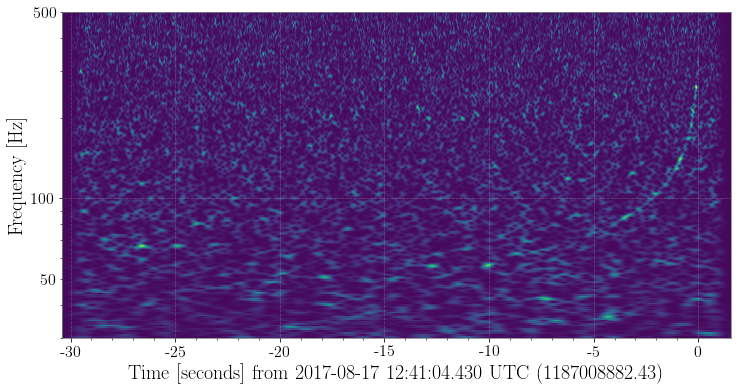

In [4]:
hq = hdata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')

Now we see the beautiful, clear track of a BNS merger, visible from about -4 seconds (maye -10 if you squint), all the way through to the merger at T=0.

We can repeat the exercise using LIGO-Livingston data to see something even more remarkable.
First we download and filter the Livingston data:

In [5]:
ldata = TimeSeries.fetch_open_data('L1', *segment, tag='CLN', verbose=True)

Fetched 1 URLs from https://losc.ligo.org for [1187008852 .. 1187008884)
Reading data... [Done]


We can now process the `ldata` `TimeSeries` using a Q-transform, using the same parameters we used for the Hanford Q-transform:

In [6]:
lq = ldata.q_transform(frange=(30, 500), qrange=(100, 110))

Now we can make a new figure including data from both interferometers:

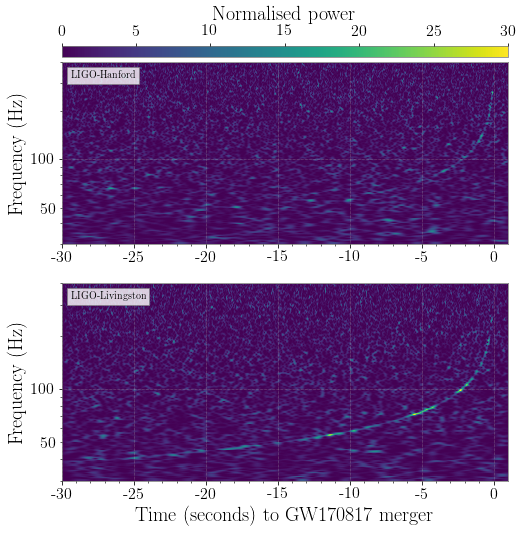

In [7]:
# create the figure and plot the data on separate axes
from matplotlib import pyplot
from gwpy.plotter import TimeSeriesPlot
plot = pyplot.figure(figsize=(8, 8), FigureClass=TimeSeriesPlot)
hax = plot.add_subplot(2, 1, 1)
hax.plot(hq, vmin=0, vmax=30)
lax = plot.add_subplot(2, 1, 2)
lax.plot(lq, vmin=0, vmax=30)

# add hidden elements that we can use for labelling
hax.plot(gps, 0, label='LIGO-Hanford', visible=False)
hax.legend(loc='upper left', handlelength=0, handletextpad=0)
lax.plot(gps, 0, label='LIGO-Livingston', visible=False)
lax.legend(loc='upper left', handlelength=0, handletextpad=0)

# format the axes
for ax in plot.axes:
    ax.set_epoch(gps)
    ax.set_xlim(gps-30, gps+1)
    ax.set_yscale('log')
    ax.set_ylim(30, 400)
    ax.set_ylabel('Frequency (Hz)')
hax.set_xlabel('')
lax.set_xlabel('Time (seconds) to GW170817 merger')

# finalise
plot.add_colorbar(ax=hax, label='Normalised power', location='top')

Now we can a BNS merge all the way back to T=-25 seconds in LIGO-Livingston data!

This is basically the same procedure (and the same code) that was used to produce Figure 1 of the BNS discovery article '_Observation of Gravitational Waves from a Binary Neutron Star Inspiral_' [[link](https://doi.org/10.1103/PhysRevLett.119.161101)]